https://www.youtube.com/watch?v=_HDMCCLlGl4

In [498]:
from os import listdir
from os.path import isfile, join
import pathlib
import pandas as pd
import os

In [499]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
import matplotlib.pyplot as plt
import librosa
#from pyAudioAnalysis import audioBasicIO #don't really need pyaudioanalysis
#from pyAudioAnalysis import ShortTermFeatures

In [500]:
from datetime import datetime

In [501]:
tac_path = '/Users/lolajohnston/Documents/03_school/003_Spring2020/001_Machine_Learning/final_project/data/clean_tac'

In [502]:
# join all files in folder together
tac_files = [f for f in listdir(tac_path) if isfile(join(tac_path, f))]

In [503]:
#LJ ADDED

#

tac_files

['DK3500_clean_TAC.csv',
 'JR8022_clean_TAC.csv',
 'SA0297_clean_TAC.csv',
 'BU4707_clean_TAC.csv',
 'HV0618_clean_TAC.csv',
 'SF3079_clean_TAC.csv',
 'MJ8002_clean_TAC.csv',
 'CC6740_clean_TAC.csv',
 'PC6771_clean_TAC.csv',
 'MC7070_clean_TAC.csv',
 'DC6359_clean_TAC.csv',
 'BK7610_clean_TAC.csv',
 'JB3156_clean_TAC.csv']

In [504]:
#read in tac data, add 3 zeros to each to match size of accelerometer timestamp ints
tac = pd.DataFrame(columns = ['timestamp','TAC_Reading','pid'])

for i in range(len(tac_files)):
    tac_temp = pd.read_csv(tac_path + '/' + tac_files[i])
    tac_temp['pid'] = tac_files[i][0:6]
    tac = tac.append(tac_temp)
    
tac['time'] = pd.to_numeric(tac['timestamp'].astype(str) + '000')
tac = tac.drop('timestamp', axis = 1)

In [505]:
pwd

'/Users/lolajohnston/Documents/03_school/003_Spring2020/001_Machine_Learning/final_project/data'

In [506]:
try:
    os.chdir('/Users/lolajohnston/Documents/03_school/003_Spring2020/001_Machine_Learning/final_project/data')
    print("Directory changed")
except OSError:
        print("Can't change the Current Working Directory") 

Directory changed


In [507]:
pwd

'/Users/lolajohnston/Documents/03_school/003_Spring2020/001_Machine_Learning/final_project/data'

In [508]:
#acc data is in same path as this notebook
#read acc data
acc = pd.read_csv('/Users/lolajohnston/Documents/03_school/003_Spring2020/001_Machine_Learning/final_project/data/all_accelerometer_data_pids_13.csv')
ids = acc['pid'].unique()

In [509]:
comb = pd.DataFrame(columns = pd.merge_asof(acc[acc['pid'] == ids[0]],tac[tac['pid'] == ids[0]], on = 'time').columns)

for i in range(len(ids)):
    comb = comb.append(pd.merge_asof(acc[acc['pid'] == ids[i]],tac[tac['pid'] == ids[i]], on = 'time', direction = 'nearest'))

In [510]:
comb

,time,pid_x,x,y,z,TAC_Reading,pid_y
0,0,JB3156,0.000000,0.000000,0.000000,0.002387,JB3156
1,1493739732016,JB3156,-2.556815,8.312009,14.090558,0.035549,JB3156
2,1493739732035,JB3156,-2.499538,8.636412,13.906186,0.035549,JB3156
3,1493739732055,JB3156,-2.471458,8.687223,13.677473,0.035549,JB3156
4,1493739732075,JB3156,-2.244561,8.832140,13.288850,0.035549,JB3156
...,...,...,...,...,...,...,...
1339617,1493809885629,DK3500,-0.000800,0.000500,0.006300,0.011943,DK3500
1339618,1493809885654,DK3500,0.001000,-0.000300,0.006100,0.011943,DK3500
1339619,1493809885679,DK3500,-0.000200,-0.000100,0.006300,0.011943,DK3500
1339620,1493809885705,DK3500,-0.001100,0.000100,0.006700,0.011943,DK3500


In [511]:
#dropping two instances where accelerometer output is zero for all readings
comb = comb[comb['time'] != 0]

#shouldn't be any NAs but whatever
comb = comb.dropna(axis = 0)

In [512]:
#confirm pids match
(comb['pid_x'] != comb['pid_y']).sum()

0

In [513]:
#drop redundant pid column
comb = comb.rename(columns={'pid_x': 'pid'})
comb = comb.drop('pid_y', axis = 1)

In [514]:
#how merge_asof works: essentially a left join
right = pd.DataFrame({'a': [1, 5, 10], 'left_val': ['a', 'b', 'c']})
left = pd.DataFrame({'a': [1, 2, 3, 6, 7],
                      'right_val': [1, 2, 3, 6, 7]})
pd.merge_asof(left, right, on='a', direction = 'nearest')

,a,right_val,left_val
0,1,1,a
1,2,2,a
2,3,3,a
3,6,6,b
4,7,7,b


In [515]:
comb.to_pickle('./joined.pkl')

In [516]:
df = pd.read_pickle('joined.pkl')

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14057565 entries, 1 to 1339621
Data columns (total 6 columns):
time           object
pid            object
x              float64
y              float64
z              float64
TAC_Reading    float64
dtypes: float64(4), object(2)
memory usage: 750.8+ MB


In [519]:

# checking to see if there was an error here
#karen = df10['pid'] == 'PC6771'
#hermoine = df10['pid'] == 'MC7070'

In [520]:
#dfk = df10[karen]
#dfh = df10[hermoine]

In [524]:
# number of times u cross 0

def getZeroCrossingRate(arr):
        my_array = np.array(arr)
        return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))

In [525]:
# fast for...yay? transfrom... something about sin-o-soids. 
# something about signals
# extract dominant freq
# rebuild signal using sino-soids


# removes noise

def fft_and_zero_cross(df, pid):
    
    sec = 51
    short = sec*2
    full = sec*10
    big = sec*1000
    
    df = df[df['pid'] == pid].copy().reset_index().drop('index', axis = 1)
    
    windows = np.arange(0,len(df),big)
    
    
    df['x_fft_1'] = 0
    df['x_fft_2'] = 0
    df['x_fft_3'] = 0

    df['y_fft_1'] = 0
    df['y_fft_2'] = 0
    df['y_fft_3'] = 0
    
    df['z_fft_1'] = 0
    df['z_fft_2'] = 0
    df['z_fft_3'] = 0

    df_app = pd.DataFrame(columns = df.columns)
    
    for i in range(len(windows)-1):
        
        small = df.iloc[windows[i]:windows[i+1]].copy()
        
        x_fft = scipy.fft.fft(np.array(small['x'])).real
        
        small['x_fft_1'] = x_fft[0]
        small['x_fft_2'] = x_fft[1]
        small['x_fft_3'] = x_fft[2]
        small['x_fft_max'] = x_fft.max()
        
        small['x_zcr'] = getZeroCrossingRate(np.array(small['x']))
        
        y_fft = scipy.fft.fft(np.array(small['y'])).real
        
        small['y_fft_1'] = y_fft[0]
        small['y_fft_2'] = y_fft[1]
        small['y_fft_3'] = y_fft[2]
        small['y_fft_max'] = y_fft.max()
        
        small['y_zcr'] = getZeroCrossingRate(np.array(small['y']))
        
        z_fft = scipy.fft.fft(np.array(small['z'])).real
        
        small['z_fft_1'] = z_fft[0]
        small['z_fft_2'] = z_fft[1]
        small['z_fft_3'] = z_fft[2]
        small['z_fft_max'] = z_fft.max()
        
        small['z_zcr'] = getZeroCrossingRate(np.array(small['z']))
        
        df_app = df_app.append(small)
        
    df = df_app.reset_index().drop('index', axis = 1)
    
    return df

In [526]:
# feature extraction from audio signals


def mfcc(df, pid):
    
    #give whole df, one pid at a time
    
    df = df[df['pid'] == pid].copy().reset_index().drop('index', axis = 1)
    
    Fs = 40
    mfcc_x_array = librosa.feature.mfcc(np.array(df['x']), sr=Fs).T
    mfcc_y_array = librosa.feature.mfcc(np.array(df['y']), sr=Fs).T
    mfcc_z_array = librosa.feature.mfcc(np.array(df['z']), sr=Fs).T

    x_mfcc = pd.DataFrame(mfcc_x_array)
    y_mfcc = pd.DataFrame(mfcc_y_array)
    z_mfcc = pd.DataFrame(mfcc_z_array)

    expansion_x = round(len(df)/len(x_mfcc))
    new_index_x = (pd.DataFrame(x_mfcc).index * expansion_x)
    x_mfcc.index = new_index_x

    expansion_y = round(len(df)/len(y_mfcc))
    new_index_y = (pd.DataFrame(y_mfcc).index * expansion_y)
    y_mfcc.index = new_index_x

    expansion_z = round(len(df)/len(z_mfcc))
    new_index_z = (pd.DataFrame(z_mfcc).index * expansion_z)
    z_mfcc.index = new_index_z

    df = pd.merge_asof(df,x_mfcc, left_index = True, right_index = True)
    df = pd.merge_asof(df,y_mfcc, left_index = True, right_index = True)
    df = pd.merge_asof(df,z_mfcc, left_index = True, right_index = True)
    
    df = df.reset_index().drop('index', axis = 1)
 
    #new_names = [(i,i+'_z') for i in df.iloc[:, 6:].columns.values]
    #df.rename(columns = dict(new_names), inplace=True)

    return df

In [527]:

# magnitude of acceleration over time
# a way to look at acceleratio


# important
# root mean squared
# treat this as a signal, so you use root mean squared 
# sin(0) = 0 = sin-o-soidaraus



def rms(df,pid):
    
    #give whole df, one pid at a time
    
    df = df[df['pid'] == pid].copy()
    
    sec = 51
    short = sec*2
    sec5 = sec*5
    full = sec*10
    
    df['x_rms'] = (df['x']**2).rolling(window=short).mean()**.5
    df['y_rms'] = (df['y']**2).rolling(window=short).mean()**.5
    df['z_rms'] = (df['z']**2).rolling(window=short).mean()**.5
    
    df['x_rms_diff_sec'] = df['x_rms'].diff(periods = sec)
    df['y_rms_diff_sec'] = df['y_rms'].diff(periods = sec)
    df['z_rms_diff_sec'] = df['z_rms'].diff(periods = sec)
    
    df['x_rms_diff_sec5'] = df['x_rms'].diff(periods = sec5)
    df['y_rms_diff_sec5'] = df['y_rms'].diff(periods = sec5)
    df['z_rms_diff_sec5'] = df['z_rms'].diff(periods = sec5)
    
    df = df.reset_index().drop('index', axis = 1)
    
    return df

In [528]:
# rolling mean/ sd over windows




def basic(df,pid):
     
    sec = 51
    short = sec*2
    full = sec*10
    
    df = df[df['pid'] == pid].copy()
    
    df['x_mean_short'] = df['x'].rolling(window=short).mean()
    df['x_std_short'] = df['x'].rolling(window=short).std()
    df['x_mean_long'] = df['x'].rolling(window=full).mean()
    df['x_std_long'] = df['x'].rolling(window=full).std()
    
    df['y_mean_short'] = df['y'].rolling(window=short).mean()
    df['y_std_short'] = df['y'].rolling(window=short).std()
    df['y_mean_long'] = df['y'].rolling(window=full).mean()
    df['y_std_long'] = df['y'].rolling(window=full).std()
                          
    df['z_mean_short'] = df['z'].rolling(window=short).mean()
    df['z_std_short'] = df['z'].rolling(window=short).std()
    df['z_mean_long'] = df['z'].rolling(window=full).mean()
    df['z_std_long'] = df['z'].rolling(window=full).std()
    
    df = df.reset_index().drop('index', axis = 1)
    
    return df

### EDA

time = some linix time stamp

pid = personal id number

TAC_Reading = alcohol level



In [529]:
df['pid'].value_counts() # 13 people

CC6740    2374694
PC6771    2141701
HV0618    1876013
DK3500    1339622
BK7610    1225727
JB3156    1177748
SA0297     962901
SF3079     662949
MJ8002     631303
DC6359     591358
BU4707     447423
MC7070     318600
JR8022     307526
Name: pid, dtype: int64

In [61]:
df['pid']

1          JB3156
2          JB3156
3          JB3156
4          JB3156
5          JB3156
            ...  
1339617    DK3500
1339618    DK3500
1339619    DK3500
1339620    DK3500
1339621    DK3500
Name: pid, Length: 14057565, dtype: object

In [62]:
# Look at the correlations between the columns

corr = df.corr()['TAC_Reading'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 y             -0.048929
x             -0.002216
z              0.048929
TAC_Reading    1.000000
Name: TAC_Reading, dtype: float64

Most Negative Correlations:
 y             -0.048929
x             -0.002216
z              0.048929
TAC_Reading    1.000000
Name: TAC_Reading, dtype: float64


In [63]:
# Look at the correlations between the columns

corr = df.corr()['x'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 z             -0.058263
TAC_Reading   -0.002216
y              0.058263
x              1.000000
Name: x, dtype: float64

Most Negative Correlations:
 z             -0.058263
TAC_Reading   -0.002216
y              0.058263
x              1.000000
Name: x, dtype: float64


In [64]:
from mpl_toolkits import mplot3d


In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [893]:
df10

,0_x,0_y,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,...,y_mean_short,y_std_short,y_mean_long,y_std_long,z_mean_short,z_std_short,z_mean_long,z_std_long,converted_time,time_hour
1025,225.928587,1611.014893,5.623694,-8.048473,5.517951,8.241286,2.647241,6.725958,11.986220,6.508495,...,-0.001219,0.024546,0.006578,0.051386,0.075855,0.022090,0.060322,0.076738,2017-05-02 10:42:43.102,10
1050,227.771057,1611.014893,5.108092,-8.581861,4.884501,7.932446,2.067868,6.213092,11.747179,6.102122,...,-0.001248,0.030864,0.001166,0.028040,0.081706,0.024424,0.058900,0.065646,2017-05-02 10:42:43.606,10
1075,229.613527,1611.014893,4.592489,-9.115249,4.251051,7.623607,1.488495,5.700225,11.508137,5.695748,...,-0.001164,0.038250,0.000312,0.029159,0.087039,0.026386,0.059804,0.066573,2017-05-02 10:42:44.109,10
1100,231.455998,1611.014893,4.076887,-9.648637,3.617601,7.314767,0.909121,5.187359,11.269096,5.289375,...,-0.001014,0.045503,-0.000087,0.031230,0.092713,0.028352,0.061298,0.067390,2017-05-02 10:42:44.613,10
1125,233.298468,1611.014893,3.561284,-10.182025,2.984152,7.005927,0.329748,4.674492,11.030055,4.883001,...,-0.000954,0.052193,-0.000311,0.033831,0.099608,0.030048,0.063352,0.068050,2017-05-02 10:42:45.117,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325875,-225.459196,-233.763180,4.373510,0.104343,-0.534342,1.235520,0.452617,3.178741,-0.820464,-1.153399,...,0.000147,0.000451,0.000102,0.000461,0.008564,0.001091,0.006887,0.001329,2017-05-03 06:05:40.415,6
1325900,-225.506707,-233.799605,4.321813,0.287963,-0.469155,1.299418,0.460864,3.362145,-0.845657,-1.095216,...,0.000169,0.000452,0.000107,0.000461,0.008796,0.001193,0.007018,0.001470,2017-05-03 06:05:41.041,6
1325925,-225.554217,-233.836030,4.270115,0.471582,-0.403967,1.363315,0.469111,3.545549,-0.870851,-1.037033,...,0.000190,0.000457,0.000112,0.000462,0.008936,0.001269,0.007153,0.001614,2017-05-03 06:05:41.668,6
1325950,-225.601727,-233.872455,4.218418,0.655202,-0.338780,1.427213,0.477358,3.728953,-0.896045,-0.978850,...,0.000206,0.000463,0.000118,0.000463,0.009008,0.001319,0.007290,0.001758,2017-05-03 06:05:42.295,6


In [894]:
name_dict

{'CC6740': 'brad',
 'PC6771': 'karen',
 'HV0618': 'ron',
 'DK3500': 'harry',
 'BK7610': 'luna',
 'JB3156': 'joe',
 'SA0297': 'draco',
 'MJ8002': 'neville',
 'SF3079': 'cedrick',
 'DC6359': 'hagrid',
 'BU4707': 'jane',
 'MC7070': 'hermione',
 'JR8022': 'flor'}

In [895]:
pid_1 = df10['pid'] == 'PC6771'

In [896]:
pid_1 = df10[pid_1]

## EDA, plotting individual sensor data first to understand how to interpret the data

In [879]:
pid_1 = df10_eda[pid_1]

In [897]:
pid_1

,0_x,0_y,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,...,y_mean_short,y_std_short,y_mean_long,y_std_long,z_mean_short,z_std_short,z_mean_long,z_std_long,converted_time,time_hour
1025,76.537253,57.724053,-0.616686,-6.830066,-7.087896,-2.300724,-2.957650,-1.226010,-0.918743,3.159889,...,0.002039,0.008107,0.003896,0.013318,0.001180,0.007830,0.000362,0.014414,2017-05-02 09:28:34.065,9
1050,72.903648,54.838102,-0.898622,-7.014067,-7.207245,-2.650979,-2.876539,-1.290257,-0.866538,3.029367,...,0.001921,0.008285,0.003691,0.012755,0.001206,0.007961,0.000438,0.013605,2017-05-02 09:28:34.691,9
1075,69.270042,51.952151,-1.180557,-7.198068,-7.326594,-3.001233,-2.795428,-1.354504,-0.814333,2.898846,...,0.001764,0.008520,0.003475,0.012208,0.001238,0.008151,0.000528,0.012825,2017-05-02 09:28:35.315,9
1100,65.636437,49.066200,-1.462493,-7.382070,-7.445943,-3.351488,-2.714316,-1.418751,-0.762128,2.768324,...,0.001612,0.008739,0.003248,0.011683,0.001251,0.008272,0.000615,0.012087,2017-05-02 09:28:35.940,9
1125,62.002831,46.180249,-1.744428,-7.566071,-7.565293,-3.701742,-2.633205,-1.482998,-0.709922,2.637802,...,0.001484,0.009015,0.003033,0.011320,0.001308,0.008566,0.000701,0.011499,2017-05-02 09:28:36.565,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090875,-158.761940,-163.553531,1.332552,-0.539881,-0.433532,1.277614,0.714852,2.382195,-0.707426,1.727468,...,0.000081,0.000985,0.000107,0.000998,0.000924,0.001092,0.000881,0.001062,2017-05-03 09:02:21.590,9
2090900,-158.834339,-163.512951,1.218222,-0.398402,-0.277092,1.322712,0.785154,2.431489,-0.818544,1.783804,...,0.000075,0.000981,0.000106,0.000997,0.000936,0.001091,0.000883,0.001065,2017-05-03 09:02:22.213,9
2090925,-158.906737,-163.472371,1.103892,-0.256924,-0.120652,1.367810,0.855456,2.480784,-0.929663,1.840140,...,0.000072,0.000975,0.000105,0.000995,0.000940,0.001092,0.000885,0.001068,2017-05-03 09:02:22.838,9
2090950,-158.979136,-163.431790,0.989563,-0.115445,0.035788,1.412907,0.925758,2.530079,-1.040781,1.896477,...,0.000071,0.000972,0.000103,0.000993,0.000942,0.001094,0.000888,0.001072,2017-05-03 09:02:23.462,9


In [78]:
#https://github.com/sho-87/sensormotion/blob/master/tutorial.ipynb
import sensormotion as sm

In [76]:
#!pip install sensormotion


In [77]:
#!pip install --upgrade pip

In [898]:
z = pid_1['z_mean_long']  # AP antero-posterior
x = pid_1['x_mean_long']  # ML medio-lateral
y = pid_1['y_mean_long']  # VT vertical
time = pid_1['time']

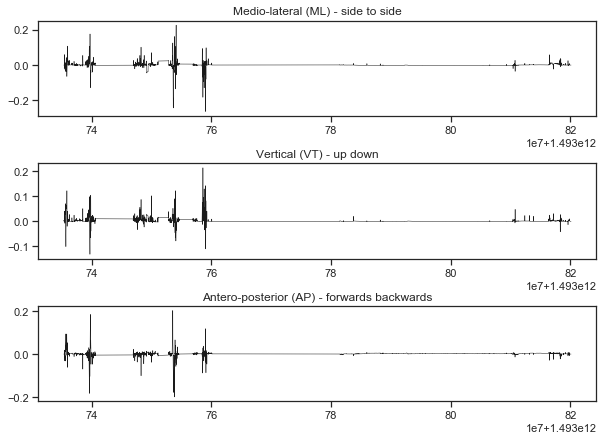

In [899]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)


### Filtering

First, we might want to identify the dominant frequencies in our signal to know the ideal thresholds for our filter. As this is only simulated data, there is little variability in the power spectrum. In reality, movement data (such as walking) can usually be low-pass filtered at 10Hz, but this depends on the specific application and the axis of interest.

In [900]:
sampling_rate = 100

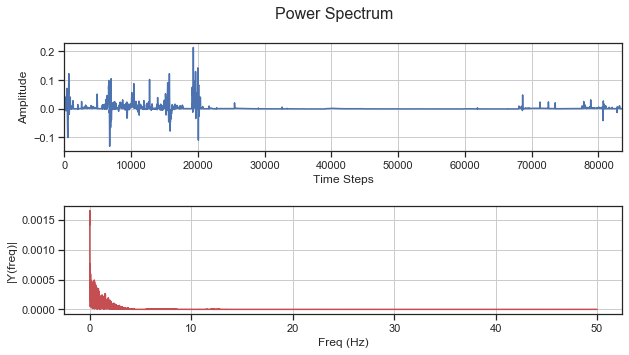

In [901]:
_ = sm.signal.fft(y, sampling_rate, plot=True)

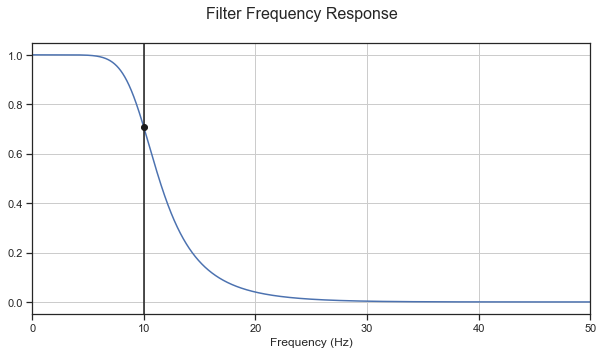

In [902]:
sm.plot.plot_filter_response(10, sampling_rate, 'low', filter_order=4)


In [903]:

# Build the filter
b, a = sm.signal.build_filter(10, sampling_rate, 'low', filter_order=4)

# Filter signals
x_f = sm.signal.filter_signal(b, a, x)  # ML medio-lateral
y_f = sm.signal.filter_signal(b, a, y)  # VT vertical
z_f = sm.signal.filter_signal(b, a, z)  # AP antero-posterior

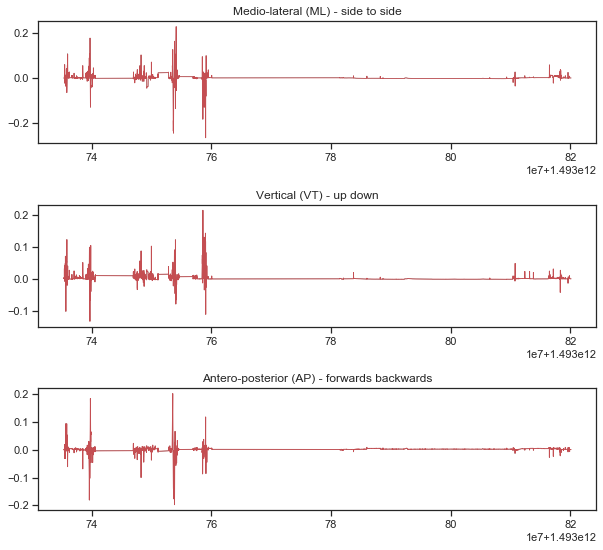

In [904]:

# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.3, color='k')
ax[0].plot(time, x_f, linewidth=0.8, color='r')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.3, color='k')
ax[1].plot(time, y_f, linewidth=0.9, color='r')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.3, color='k')
ax[2].plot(time, z_f, linewidth=0.9, color='r')

fig.subplots_adjust(hspace=.5)

### Exacting gait metrics


We can extract gait metrics, such as cadence and step time, from the filtered acceleration signals. Typically this is done using the vertical axis (Y in this case), although there are also use cases for looking at the ML axis. The first step is to identify the "valleys" in the vertical signal

what is gait?
The metric is weighted to balance each parameter's effect by normalizing the data so all parameters are more equally weighted. It is designed to combine spatial, temporal, kinematic, and kinetic gait parameter asymmetries. It can also combine subsets of the different gait parameters to provide a more thorough analysis.

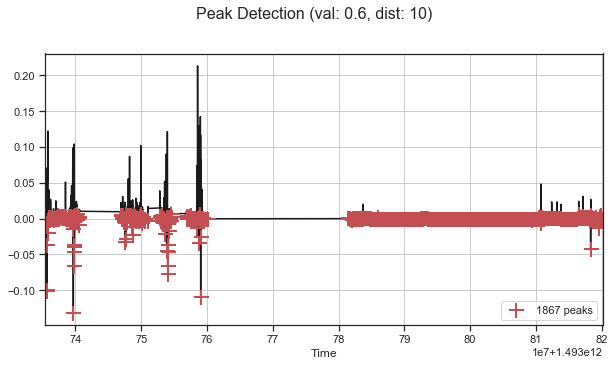

In [905]:
peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=True)

with valleys identified, we can calculate various gait metrics

In [906]:

step_count = sm.gait.step_count(peak_times)
cadence = sm.gait.cadence(time, peak_times)
step_time, step_time_sd, step_time_cov = sm.gait.step_time(peak_times)

print(' - Number of steps: {}'.format(step_count))
print(' - Cadence: {:.2f} steps/min'.format(cadence))
print(' - Mean step time: {:.2f}ms'.format(step_time))
print(' - Step time variability (standard deviation): {:.2f}'.format(step_time_sd))
print(' - Step time variability (coefficient of variation): {:.2f}'.format(step_time_cov))

 - Number of steps: 1867
 - Cadence: 1.32 steps/min
 - Mean step time: 45437.08ms
 - Step time variability (standard deviation): 519369.78
 - Step time variability (coefficient of variation): 11.43



We can also calculate autocorrelation-based metrics like step regularity, stride regularity, and step symmetry. To do this, we need to calculate the autocorrelation (AC) of the vertical (Y) signal, detect peaks in the AC, and then calculate the gait metrics. The example here shows highly regular steps due to the simulated nature of the data.

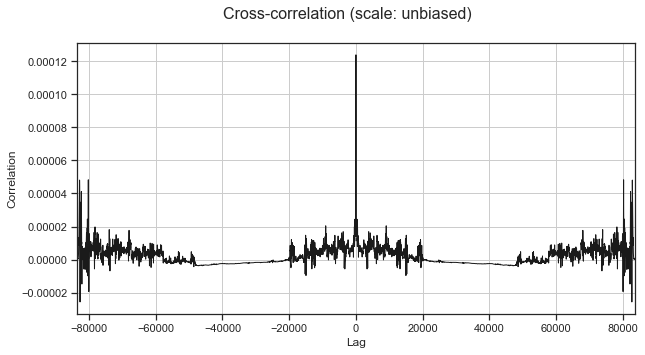

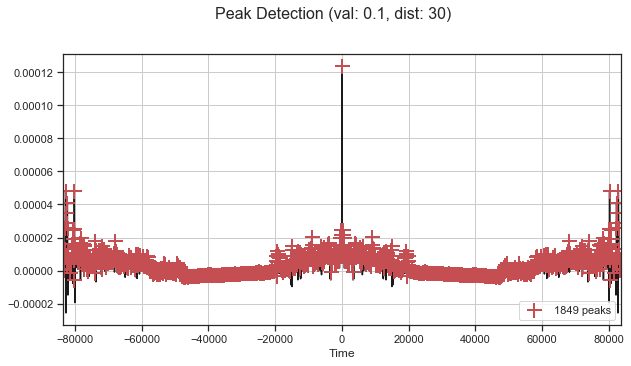

 - Step regularity: 0.1247
 - Stride regularity: 0.1570
 - Step symmetry: 0.7943


In [907]:
ac, ac_lags = sm.signal.xcorr(y_f, y_f, scale='unbiased', plot=True)

ac_peak_times, ac_peak_values = sm.peak.find_peaks(ac_lags, ac, peak_type='peak', min_val=0.1, min_dist=30, plot=True)

step_reg, stride_reg = sm.gait.step_regularity(ac_peak_values)
step_sym = sm.gait.step_symmetry(ac_peak_values)

print(' - Step regularity: {:.4f}'.format(step_reg))
print(' - Stride regularity: {:.4f}'.format(stride_reg))
print(' - Step symmetry: {:.4f}'.format(step_sym))

In [908]:
sampling_rate = 100  # number of samples per second
seconds = 600
#time = np.arange(0, seconds*sampling_rate+1) * 10  # times in milliseconds


# Adjust amount of movement at various timepoints
signals = [x, y, z]

for s in signals:
    s[20000:40000] = s[20000:40000] * 10
    s[40000:] = s[40000:] * 50

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exe

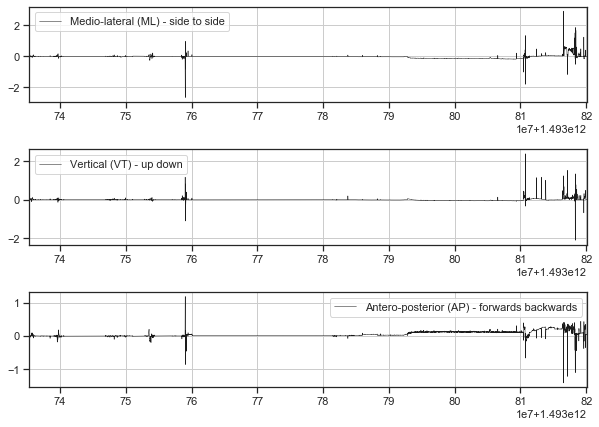

In [909]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

# EDA ON INDIVIDUALS STARTS HERE

In [22]:
#must run join_together notebook to generate joined.pkl
df = pd.read_pickle('joined.pkl')
ids = df.pid.unique()

### DF for every 1/2 second

In [191]:
# pickle for every 1/2 second for modeling
df = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project-master/joined.pkl')


# EDA PER PERSON

In [544]:
# pickle for every 10 sec --- this was incorrect so i just reduced it manually in line
df10 = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project-master/ten.pkl')


In [ ]:
# grab every 510 row
yo_df = newten.iloc[range(0,len(newten),510)]


### Convert Time to readible time

In [559]:
df10

,0_x,0_y,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,...,x_mean_long,x_std_long,y_mean_short,y_std_short,y_mean_long,y_std_long,z_mean_short,z_std_short,z_mean_long,z_std_long
1025,225.928587,1611.014893,5.623694,-8.048473,5.517951,8.241286,2.647241,6.725958,11.986220,6.508495,...,-0.016584,0.027278,-0.001219,0.024546,0.006578,0.051386,0.075855,0.022090,0.060322,0.076738
1050,227.771057,1611.014893,5.108092,-8.581861,4.884501,7.932446,2.067868,6.213092,11.747179,6.102122,...,-0.014089,0.024065,-0.001248,0.030864,0.001166,0.028040,0.081706,0.024424,0.058900,0.065646
1075,229.613527,1611.014893,4.592489,-9.115249,4.251051,7.623607,1.488495,5.700225,11.508137,5.695748,...,-0.012860,0.028080,-0.001164,0.038250,0.000312,0.029159,0.087039,0.026386,0.059804,0.066573
1100,231.455998,1611.014893,4.076887,-9.648637,3.617601,7.314767,0.909121,5.187359,11.269096,5.289375,...,-0.011744,0.032146,-0.001014,0.045503,-0.000087,0.031230,0.092713,0.028352,0.061298,0.067390
1125,233.298468,1611.014893,3.561284,-10.182025,2.984152,7.005927,0.329748,4.674492,11.030055,4.883001,...,-0.010675,0.036247,-0.000954,0.052193,-0.000311,0.033831,0.099608,0.030048,0.063352,0.068050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325875,-225.459196,-233.763180,4.373510,0.104343,-0.534342,1.235520,0.452617,3.178741,-0.820464,-1.153399,...,-0.000231,0.000518,0.000147,0.000451,0.000102,0.000461,0.008564,0.001091,0.006887,0.001329
1325900,-225.506707,-233.799605,4.321813,0.287963,-0.469155,1.299418,0.460864,3.362145,-0.845657,-1.095216,...,-0.000235,0.000518,0.000169,0.000452,0.000107,0.000461,0.008796,0.001193,0.007018,0.001470
1325925,-225.554217,-233.836030,4.270115,0.471582,-0.403967,1.363315,0.469111,3.545549,-0.870851,-1.037033,...,-0.000239,0.000518,0.000190,0.000457,0.000112,0.000462,0.008936,0.001269,0.007153,0.001614
1325950,-225.601727,-233.872455,4.218418,0.655202,-0.338780,1.427213,0.477358,3.728953,-0.896045,-0.978850,...,-0.000242,0.000518,0.000206,0.000463,0.000118,0.000463,0.009008,0.001319,0.007290,0.001758


In [560]:
# convert unix millisecond time into readible time


import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
import pandas as pd

data = 'RUN,UNIXTIME,VALUE\n1,1447160702320,10\n2,1447160702364,20\n3,1447160722364,42'

df = df10['time']

convert = lambda x: datetime.fromtimestamp(x / 1e3)
converted_df = df10['time'].apply(convert)

In [561]:
df10['converted_time'] = converted_df

In [562]:
# create hour column from converted time columng

def hr_func(ts):
    return ts.hour

df10['time_hour'] = df10['converted_time'].apply(hr_func)


In [563]:
#df10['pid']

In [564]:
# get peoples ids
df10['pid'].value_counts() # 13 people

CC6740    93799
PC6771    83599
HV0618    73399
DK3500    52999
BK7610    48919
JB3156    46879
SA0297    36679
MJ8002    24439
SF3079    24439
DC6359    22399
BU4707    16279
MC7070    12199
JR8022    12199
Name: pid, dtype: int64

In [565]:
joe = df10['pid'] == 'JB3156'
jane = df10['pid'] == 'BU4707'
hermione = df10['pid'] == 'MC7070'
karen = df10['pid'] == 'PC6771'
brad = df10['pid'] == 'CC6740'
ron = df10['pid'] == 'HV0618'
harry = df10['pid'] == 'DK3500'
luna = df10['pid'] == 'BK7610'
draco = df10['pid'] == 'SA0297'
neville = df10['pid'] == 'MJ8002'
cedrick = df10['pid'] == 'SF3079'
hagrid = df10['pid'] == 'DC6359'
flor = df10['pid'] == 'JR8022'

In [566]:
dfj = df10[joe]
dfja = df10[jane]
dfh = df10[hermione]
dfk = df10[karen]
dfb = df10[brad]
dfr = df10[ron]
dfha = df10[harry]
dfl = df10[luna]
dfd = df10[draco]
dfn = df10[neville]
dfc = df10[cedrick]
dfhg = df10[hagrid]
dff = df10[flor]

In [570]:
#df10.info

In [608]:
name_dict = {
     'CC6740':'brad',
     'PC6771':'karen',
     'HV0618':'ron',
     'DK3500':'harry',
     'BK7610':'luna',
     'JB3156':'joe',
     'SA0297':'draco',
    'MJ8002':'neville',
    'SF3079': 'cedrick',
    'DC6359':'hagrid',
     'BU4707':'jane',
    'MC7070':'hermione',
    'JR8022': 'flor'
}

In [400]:
joe = df10[joe]

In [401]:

joe2 = joe[['x_mean_long','y_mean_long','z_mean_long','converted_time','TAC_Reading']]

In [402]:
x_joe = joe2['x_mean_long']
y_joe = joe2['y_mean_long']
z_joe = joe2['z_mean_long']
time_joe = joe2['converted_time']

In [246]:
jane = df10[jane]


jane2 = jane[['x_mean_long','y_mean_long','z_mean_long','time','TAC_Reading']]

x_jane = jane2['x_mean_long']
y_jane = jane2['y_mean_long']
z_jane = jane2['z_mean_long']
time_jane = jane2['converted_time']

In [242]:
jane2['converted_time'] = converted_df_jane

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [459]:
#help(sm.plot.plot_signal)

In [276]:
brad2 = brad[['x_mean_long','y_mean_long','z_mean_long','converted_time','TAC_Reading']]


In [278]:
x_b = brad2['x_mean_long']
y_b = brad2['y_mean_long']
z_b = brad2['z_mean_long']
time_b = brad2['converted_time']

In [ ]:
karen = df10['pid'] == 'PC6771'

In [281]:
karen = df10[karen]

In [282]:
k2 = karen[['x_mean_long','y_mean_long','z_mean_long','converted_time','TAC_Reading']]


In [346]:
x_k = k2['x_mean_long']
y_k = k2['y_mean_long']
z_k = k2['z_mean_long']
time_k = k2['converted_time']

Text(0.5, 1.0, 'karen')

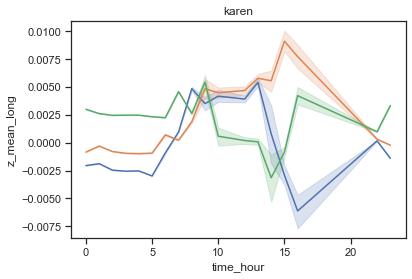

In [584]:

# trying out different plots

figsize=(20,10)
sns.lineplot(k2['time_hour'], y= k2['x_mean_long'])
sns.lineplot(k2['time_hour'], y= k2['y_mean_long'])
sns.lineplot(k2['time_hour'], y= k2['z_mean_long'])


plt.title('karen')

In [307]:
import seaborn as sns

In [ ]:
sns.lineplot(k2['time_hour'], y= k2['x_mean_long'])
sns.lineplot(k2['time_hour'], y= k2['y_mean_long'])
sns.lineplot(k2['time_hour'], y= k2['z_mean_long'])
plt.title('karen')

In [329]:
brad2['time_hour'] = brad2['converted_time'].apply(hr_func)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [365]:
x_b = brad2['x_mean_long']
y_b = brad2['y_mean_long']
z_b = brad2['z_mean_long']
time_b = brad2['time_hour']

In [366]:
# don't do this...


# setting time to the index tells pandas that this is a time series
# matplotlib will recognize that this is a variable that has to do with time

#brad2.set_index('converted_time')

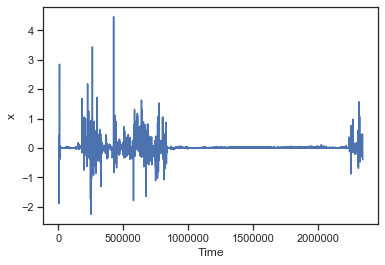

In [363]:
# trying out different plots


import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(brad2.index,brad2['x_mean_long'])

ax.set_xlabel('Time')
ax.set_ylabel('x')

plt.show()

In [367]:
brad2

,x_mean_long,y_mean_long,z_mean_long,converted_time,TAC_Reading,time_hour
1025,0.001237,0.007528,0.136590,2017-05-02 10:56:45.614,0.04187,10
1050,0.000986,0.007555,0.136668,2017-05-02 10:56:46.112,0.04187,10
1075,0.000773,0.007645,0.136708,2017-05-02 10:56:46.686,0.04187,10
1100,0.000626,0.007796,0.136707,2017-05-02 10:56:47.309,0.04187,10
1125,0.000539,0.007931,0.136673,2017-05-02 10:56:47.932,0.04187,10
...,...,...,...,...,...,...
2345875,-0.371031,0.065260,0.048351,2017-05-03 11:21:41.585,0.00504,11
2345900,-0.379225,0.069619,0.023887,2017-05-03 11:21:42.211,0.00504,11
2345925,-0.388234,0.074098,-0.000888,2017-05-03 11:21:42.836,0.00504,11
2345950,-0.396747,0.080311,-0.025092,2017-05-03 11:21:43.459,0.00504,11


# Best plots below
# Accelerometer data per person

BRAD


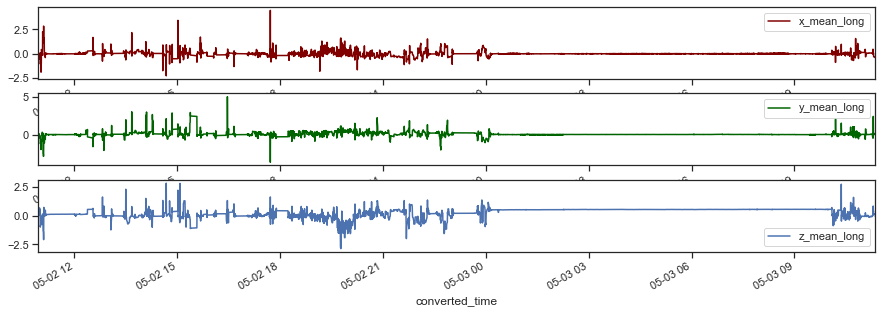

In [397]:
# trying out different plots

print('BRAD')
fig, axs = plt.subplots(3, 1, figsize=(15,5))

brad2.iloc[:100000].plot(x = 'converted_time', y= 'x_mean_long', ax=axs[0], color='maroon')
brad2.iloc[:100000].plot(x = 'converted_time', y='y_mean_long', ax=axs[1], color = 'darkgreen')
brad2.iloc[:100000].plot(x = 'converted_time', y='z_mean_long', ax=axs[2])



plt.show()


In [ ]:
x_joe = joe2['x_mean_long']
y_joe = joe2['y_mean_long']
z_joe = joe2['z_mean_long']
time_joe = joe2['converted_time']

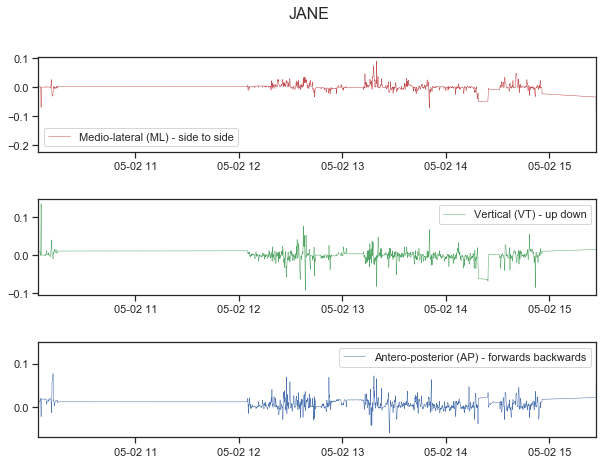

In [421]:
# JANE
sm.plot.plot_signal(time_jane, [{'data': x_jane, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': y_jane, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': z_jane, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'JANE', show_grid = False)

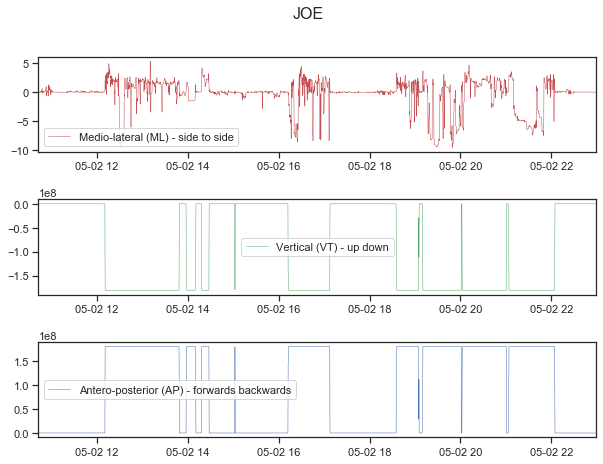

In [423]:
# JOE
sm.plot.plot_signal(time_joe, [{'data': x_joe, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': y_joe, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': z_joe, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'JOE', show_grid = False)

In [574]:
xk = dfk['x_mean_long']
yk = dfk['y_mean_long']
zk = dfk['z_mean_long']
tk = dfk['converted_time']

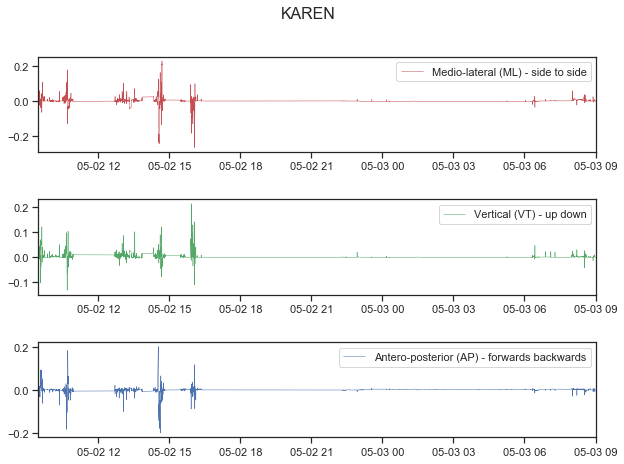

In [575]:
# KAREN

sm.plot.plot_signal(tk, [{'data': xk, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yk, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zk, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'KAREN', show_grid = False)

In [429]:
x_b = brad2['x_mean_long']
y_b = brad2['y_mean_long']
z_b = brad2['z_mean_long']
time_b = brad2['converted_time']

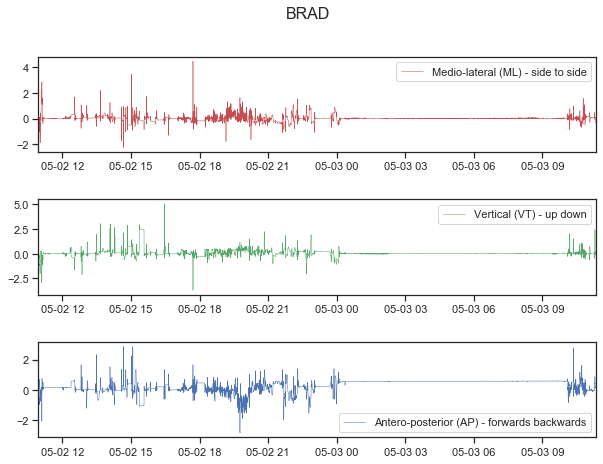

In [430]:
# BRAD

sm.plot.plot_signal(time_b, [{'data': x_b, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': y_b, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': z_b, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'BRAD', show_grid = False)

In [556]:

hermione = df10['pid'] == 'MC7070'

In [557]:
dfh = df10[hermione]

In [576]:
xh = dfh['x_mean_long']
yh = dfh['y_mean_long']
zh = dfh['z_mean_long']
th = dfh['converted_time']

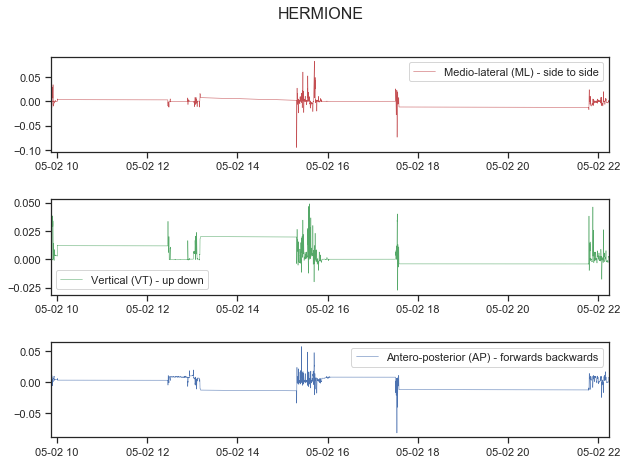

In [577]:
# HERMIONE

sm.plot.plot_signal(th, [{'data': xh, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yh, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zh, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'HERMIONE', show_grid = False)

In [437]:
xr = dfr['x_mean_long']
yr = dfr['y_mean_long']
zr = dfr['z_mean_long']
tr = dfr['converted_time']

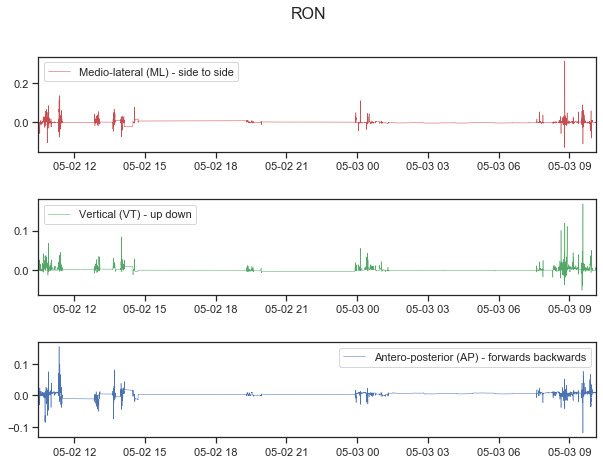

In [438]:
# RON

sm.plot.plot_signal(tr, [{'data': xr, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yr, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zr, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'RON', show_grid = False)

In [443]:
xha = dfha['x_mean_long']
yha = dfha['y_mean_long']
zha = dfha['z_mean_long']
tha = dfha['converted_time']

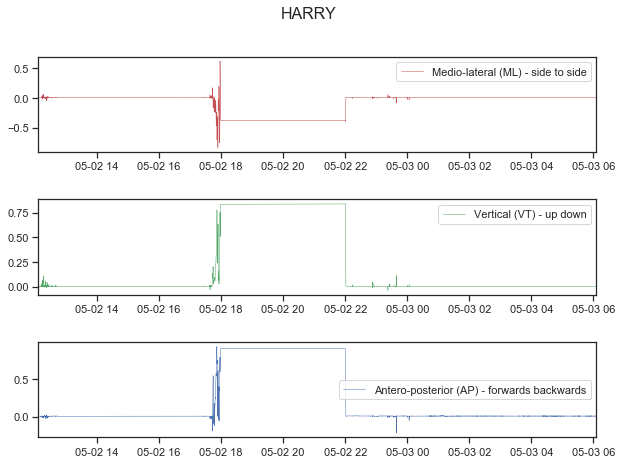

In [444]:
# HARRY

sm.plot.plot_signal(tha, [{'data': xha, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yha, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zha, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'HARRY', show_grid = False)

In [445]:
xl = dfl['x_mean_long']
yl = dfl['y_mean_long']
zl = dfl['z_mean_long']
tl = dfl['converted_time']

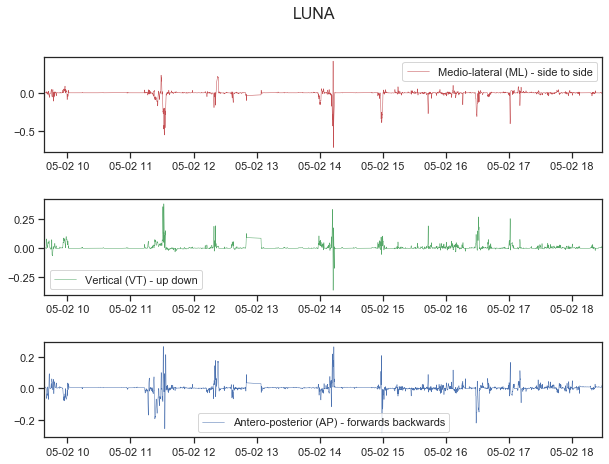

In [446]:
# LUNA

sm.plot.plot_signal(tl, [{'data': xl, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yl, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zl, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'LUNA', show_grid = False)

In [447]:
xd = dfd['x_mean_long']
yd = dfd['y_mean_long']
zd = dfd['z_mean_long']
td = dfd['converted_time']

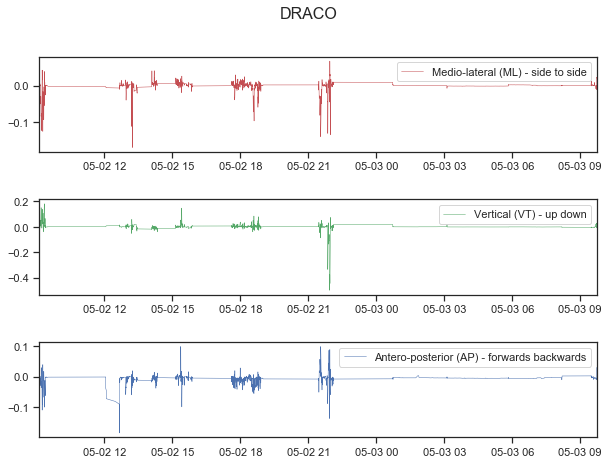

In [448]:
# DRACO

sm.plot.plot_signal(td, [{'data': xd, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yd, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zd, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'DRACO', show_grid = False)

In [450]:
xn = dfn['x_mean_long']
yn = dfn['y_mean_long']
zn = dfn['z_mean_long']
tn = dfn['converted_time']

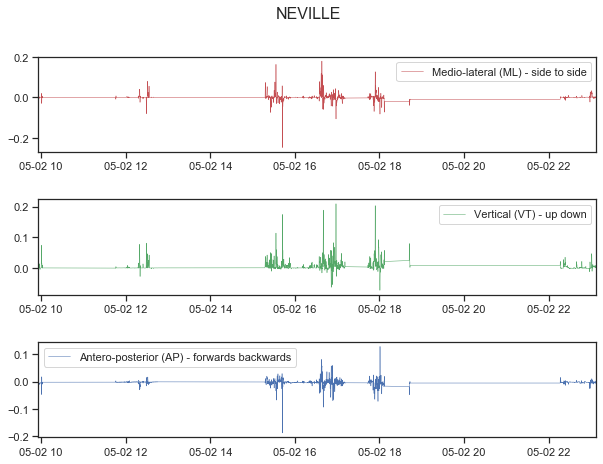

In [451]:
# NEVILLE

sm.plot.plot_signal(tn, [{'data': xn, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yn, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zn, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'NEVILLE', show_grid = False)

In [452]:
xc = dfc['x_mean_long']
yc = dfc['y_mean_long']
zc = dfc['z_mean_long']
tc = dfc['converted_time']

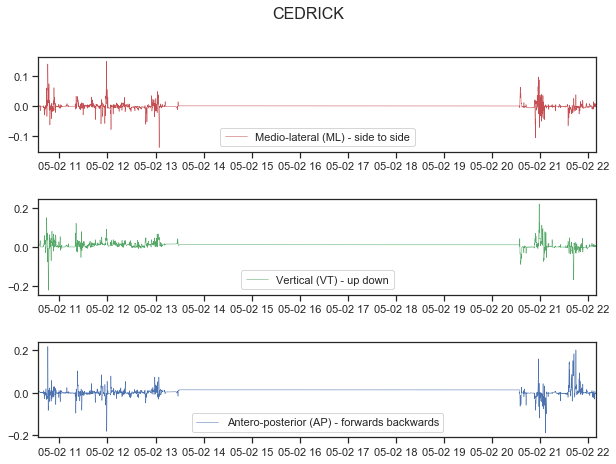

In [453]:
# CEDRICK

sm.plot.plot_signal(tc, [{'data': xc, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yc, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zc, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'CEDRICK', show_grid = False)

In [455]:
xhg = dfhg['x_mean_long']
yhg = dfhg['y_mean_long']
zhg = dfhg['z_mean_long']
thg = dfhg['converted_time']

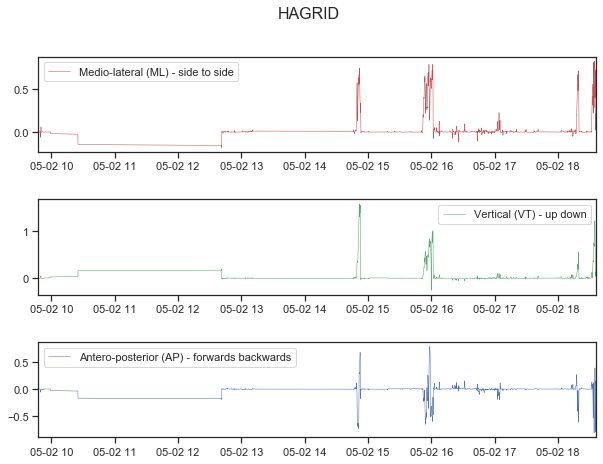

In [456]:
# HAGRID

sm.plot.plot_signal(thg, [{'data': xhg, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yhg, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zhg, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'HAGRID', show_grid = False)

In [457]:
xf = dff['x_mean_long']
yf = dff['y_mean_long']
zf = dff['z_mean_long']
tf = dff['converted_time']

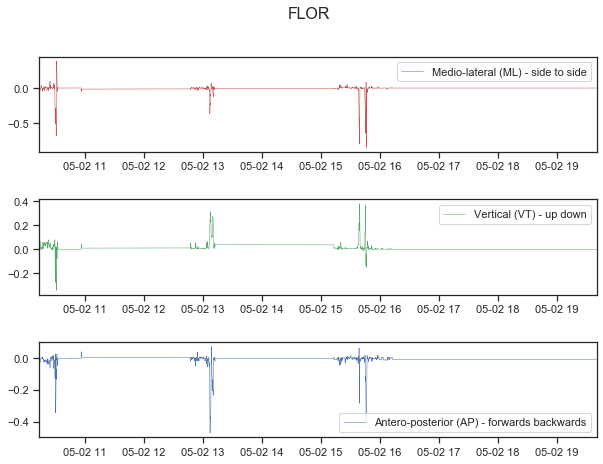

In [458]:
# FLOR

sm.plot.plot_signal(tf, [{'data': xf, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5, 'color': 'r'},
                           {'data': yf, 'label': 'Vertical (VT) - up down', 'line_width': 0.5, 'color': 'g'},
                           {'data': zf, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5, 'color': 'b'}],
                    subplots=True, fig_size=(10,7), title = 'FLOR', show_grid = False)

In [ ]:

dff = df10[flor]

### ones with issues

 - joe = df10['pid'] == 'JB3156'
 - harry = df10['pid'] == 'DK3500'
 - hagrid = df10['pid'] == 'DC6359'

### DRUNK LEVELS

In [630]:
df10_eda

,x_mean_long,y_mean_long,z_mean_long,converted_time,TAC_Reading,time_hour,pid,name
1025,-0.016584,0.006578,0.060322,2017-05-02 10:42:43.102,0.035549,10,JB3156,joe
1050,-0.014089,0.001166,0.058900,2017-05-02 10:42:43.606,0.035549,10,JB3156,joe
1075,-0.012860,0.000312,0.059804,2017-05-02 10:42:44.109,0.035549,10,JB3156,joe
1100,-0.011744,-0.000087,0.061298,2017-05-02 10:42:44.613,0.035549,10,JB3156,joe
1125,-0.010675,-0.000311,0.063352,2017-05-02 10:42:45.117,0.035549,10,JB3156,joe
...,...,...,...,...,...,...,...,...
1325875,-0.000231,0.000102,0.006887,2017-05-03 06:05:40.415,0.011943,6,DK3500,harry
1325900,-0.000235,0.000107,0.007018,2017-05-03 06:05:41.041,0.011943,6,DK3500,harry
1325925,-0.000239,0.000112,0.007153,2017-05-03 06:05:41.668,0.011943,6,DK3500,harry
1325950,-0.000242,0.000118,0.007290,2017-05-03 06:05:42.295,0.011943,6,DK3500,harry


In [ ]:
dfj = df10[joe]
dfja = df10[jane]
dfh = df10[hermione]
dfk = df10[karen]
dfb = df10[brad]
dfr = df10[ron]
dfha = df10[harry]
dfl = df10[luna]
dfd = df10[draco]
dfn = df10[neville]
dfc = df10[cedrick]
dfhg = df10[hagrid]
dff = df10[flor]

In [644]:
df_temp = df10_eda

In [659]:
datetime.strptime(df10_eda['converted_time'],"%m/%d/%y")

TypeError: strptime() argument 1 must be str, not Series

In [658]:
df10_eda['temp_time'] = str(df10_eda['converted_time'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [660]:
for i in df10_eda['temp_time']:
    print[]

,x_mean_long,y_mean_long,z_mean_long,converted_time,TAC_Reading,time_hour,pid,name,temp_time
1025,-0.016584,0.006578,0.060322,2017-05-02 10:42:43.102,0.035549,10,JB3156,joe,1025 2017-05-02 10:42:43.102\n1050 2...
1050,-0.014089,0.001166,0.058900,2017-05-02 10:42:43.606,0.035549,10,JB3156,joe,1025 2017-05-02 10:42:43.102\n1050 2...
1075,-0.012860,0.000312,0.059804,2017-05-02 10:42:44.109,0.035549,10,JB3156,joe,1025 2017-05-02 10:42:43.102\n1050 2...
1100,-0.011744,-0.000087,0.061298,2017-05-02 10:42:44.613,0.035549,10,JB3156,joe,1025 2017-05-02 10:42:43.102\n1050 2...
1125,-0.010675,-0.000311,0.063352,2017-05-02 10:42:45.117,0.035549,10,JB3156,joe,1025 2017-05-02 10:42:43.102\n1050 2...
...,...,...,...,...,...,...,...,...,...
1325875,-0.000231,0.000102,0.006887,2017-05-03 06:05:40.415,0.011943,6,DK3500,harry,1025 2017-05-02 10:42:43.102\n1050 2...
1325900,-0.000235,0.000107,0.007018,2017-05-03 06:05:41.041,0.011943,6,DK3500,harry,1025 2017-05-02 10:42:43.102\n1050 2...
1325925,-0.000239,0.000112,0.007153,2017-05-03 06:05:41.668,0.011943,6,DK3500,harry,1025 2017-05-02 10:42:43.102\n1050 2...
1325950,-0.000242,0.000118,0.007290,2017-05-03 06:05:42.295,0.011943,6,DK3500,harry,1025 2017-05-02 10:42:43.102\n1050 2...


In [703]:
newten = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project-master/newten.pkl')

In [704]:
newten

,0_x,0_y,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,...,x_mean_long,x_std_long,y_mean_short,y_std_short,y_mean_long,y_std_long,z_mean_short,z_std_short,z_mean_long,z_std_long
1025,225.928587,1611.014893,5.623694,-8.048473,5.517951,8.241286,2.647241,6.725958,11.986220,6.508495,...,-0.016584,0.027278,-0.001219,0.024546,0.006578,0.051386,0.075855,0.022090,0.060322,0.076738
1050,227.771057,1611.014893,5.108092,-8.581861,4.884501,7.932446,2.067868,6.213092,11.747179,6.102122,...,-0.014089,0.024065,-0.001248,0.030864,0.001166,0.028040,0.081706,0.024424,0.058900,0.065646
1075,229.613527,1611.014893,4.592489,-9.115249,4.251051,7.623607,1.488495,5.700225,11.508137,5.695748,...,-0.012860,0.028080,-0.001164,0.038250,0.000312,0.029159,0.087039,0.026386,0.059804,0.066573
1100,231.455998,1611.014893,4.076887,-9.648637,3.617601,7.314767,0.909121,5.187359,11.269096,5.289375,...,-0.011744,0.032146,-0.001014,0.045503,-0.000087,0.031230,0.092713,0.028352,0.061298,0.067390
1125,233.298468,1611.014893,3.561284,-10.182025,2.984152,7.005927,0.329748,4.674492,11.030055,4.883001,...,-0.010675,0.036247,-0.000954,0.052193,-0.000311,0.033831,0.099608,0.030048,0.063352,0.068050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325875,-225.459196,-233.763180,4.373510,0.104343,-0.534342,1.235520,0.452617,3.178741,-0.820464,-1.153399,...,-0.000231,0.000518,0.000147,0.000451,0.000102,0.000461,0.008564,0.001091,0.006887,0.001329
1325900,-225.506707,-233.799605,4.321813,0.287963,-0.469155,1.299418,0.460864,3.362145,-0.845657,-1.095216,...,-0.000235,0.000518,0.000169,0.000452,0.000107,0.000461,0.008796,0.001193,0.007018,0.001470
1325925,-225.554217,-233.836030,4.270115,0.471582,-0.403967,1.363315,0.469111,3.545549,-0.870851,-1.037033,...,-0.000239,0.000518,0.000190,0.000457,0.000112,0.000462,0.008936,0.001269,0.007153,0.001614
1325950,-225.601727,-233.872455,4.218418,0.655202,-0.338780,1.427213,0.477358,3.728953,-0.896045,-0.978850,...,-0.000242,0.000518,0.000206,0.000463,0.000118,0.000463,0.009008,0.001319,0.007290,0.001758


In [705]:
# convert unix millisecond time into readible time


import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
import pandas as pd

data = 'RUN,UNIXTIME,VALUE\n1,1447160702320,10\n2,1447160702364,20\n3,1447160722364,42'

df = newten['time']

convert = lambda x: datetime.fromtimestamp(x / 1e3)
converted_df = newten['time'].apply(convert)

In [706]:
newten['converted_time'] = converted_df

In [707]:
def day_func(ts):
    return ts.day

In [708]:
newten['time_day'] = newten['converted_time'].apply(day_func)


In [709]:
newten['time_hour'] = newten['converted_time'].apply(hr_func)

newten = newten[['x_mean_long','y_mean_long','z_mean_long','converted_time','time_hour','TAC_Reading','pid']]

In [710]:
def month_day_hour_func(ts):
    return str(ts.month) +'/'+ str(ts.day) + ' - ' + str(ts.hour)


In [712]:
newten['timetest'] = newten['converted_time'].apply(month_day_hour_func)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [716]:
newten.sort_values(by=['timetest'])

,x_mean_long,y_mean_long,z_mean_long,converted_time,time_hour,TAC_Reading,pid,timetest,name
1025,-0.016584,0.006578,0.060322,2017-05-02 10:42:43.102,10,0.035549,JB3156,5/2 - 10,joe
171075,0.000146,0.000026,0.007375,2017-05-02 10:51:32.901,10,0.085197,BK7610,5/2 - 10,luna
171100,0.000150,0.000030,0.007475,2017-05-02 10:51:33.527,10,0.085197,BK7610,5/2 - 10,luna
171125,0.000154,0.000032,0.007582,2017-05-02 10:51:34.155,10,0.085197,BK7610,5/2 - 10,luna
171150,0.000158,0.000034,0.007696,2017-05-02 10:51:34.777,10,0.085197,BK7610,5/2 - 10,luna
...,...,...,...,...,...,...,...,...,...
2227225,0.005982,0.008489,0.576209,2017-05-03 09:59:34.435,9,0.005040,CC6740,5/3 - 9,brad
2227200,0.005946,0.008382,0.576171,2017-05-03 09:59:33.811,9,0.005040,CC6740,5/3 - 9,brad
2227175,0.005891,0.008345,0.576145,2017-05-03 09:59:33.185,9,0.005040,CC6740,5/3 - 9,brad
2227525,0.004980,0.008529,0.576122,2017-05-03 09:59:41.936,9,0.005040,CC6740,5/3 - 9,brad


In [714]:
# create new column with names using 'name_dict' dictionary
newten['name']= newten['pid'].map(name_dict)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


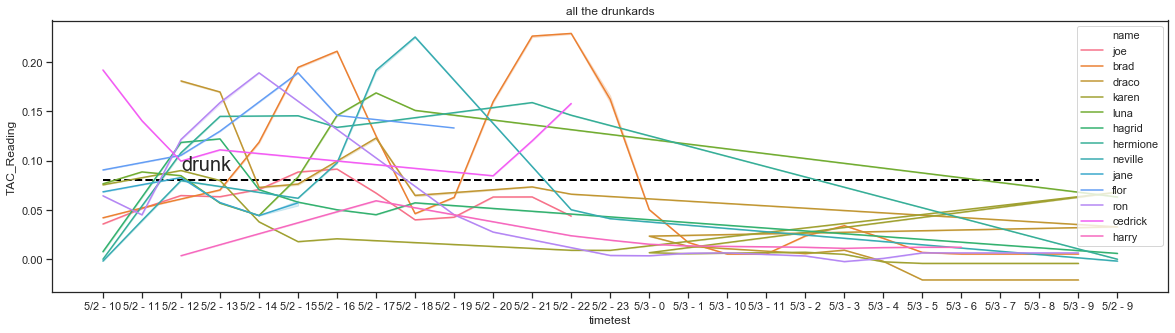

In [715]:

# trying out different plots
plt.figure(figsize=(20,5))
plt.plot([0,24], [0.08, 0.08], linewidth=2, color = 'black', linestyle = '--') # drunk line
plt.text(2, 0.09, 'drunk', fontsize=20)
sns.color_palette("Set3")
plt.title('all the drunkards')
sns.lineplot(newten['timetest'], y= newten['TAC_Reading'],hue=newten['name'], markers = True)


In [603]:
df10_eda = df10[['x_mean_long','y_mean_long','z_mean_long','converted_time','TAC_Reading', 'time_hour','pid']]

In [610]:
# create new column with names using 'name_dict' dictionary
df10_eda['name']= df10_eda['pid'].map(name_dict)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [749]:
# grab every 510 row
eda_2 = df10_eda.iloc[range(0,len(df10_eda),510)]

In [752]:
eda_2['timetest'] = eda_2['converted_time'].apply(month_day_hour_func)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [755]:
rally_time = eda_2.groupby('name')['converted_time'].agg([min, max])

In [758]:
rally_time['length'] = rally_time['max'] - rally_time['min']

In [775]:
rally_time['hours2'] = rally_time['length'].astype(str)

In [778]:
rally_time = rally_time[['min','max','length', 'hours2']]


In [786]:
rally_time['days'] = [x[:1] for x in rally_time['hours2']]

In [784]:
rally_time['hours'] = [x[7:9] for x in rally_time['hours2']]

In [788]:
rally = rally_time.drop(['min', 'max','length','hours2','hours3'], axis=1)

In [792]:
rally.xs('brad')['hours']=24

In [794]:
rally.xs('draco')['hours']=24

In [797]:
session_length = rally.drop(['days'], axis = 1)

In [799]:
lushes = eda_2.groupby('name')['TAC_Reading'].agg([min, max])

In [805]:
lushes = lushes.drop(['min'], axis = 1)

In [806]:
peeps = lushes.join(session_length, lsuffix='name', rsuffix='name')

In [810]:
peeps.sort_values(by='max', ascending= False)

,max,hours
name,,
brad,0.244715,24
neville,0.217373,13
flor,0.206761,05
cedrick,0.205234,11
ron,0.193617,23
draco,0.182644,24
luna,0.171758,08
hermione,0.165357,12
hagrid,0.122072,08


In [816]:
peeps = peeps.reset_index()

In [823]:
peeps['hours'] = pd.to_numeric(peeps['hours'])

In [859]:
peeps['lush'] = round((peeps['max']/(0.2447))*100)

In [862]:
#lush = peeps[['name', 'lush'
peeps.sort_values(by='lush', ascending = False)

# do stacked bar chart in ppt

,name,max,hours,lush
0,brad,0.244715,24,100.0
11,neville,0.217373,13,89.0
1,cedrick,0.205234,11,84.0
3,flor,0.206761,5,84.0
12,ron,0.193617,23,79.0
2,draco,0.182644,24,75.0
10,luna,0.171758,8,70.0
6,hermione,0.165357,12,68.0
4,hagrid,0.122072,8,50.0
8,joe,0.096366,12,39.0


In [841]:
peeps = peeps.sort_values(by= 'hours', ascending = False)

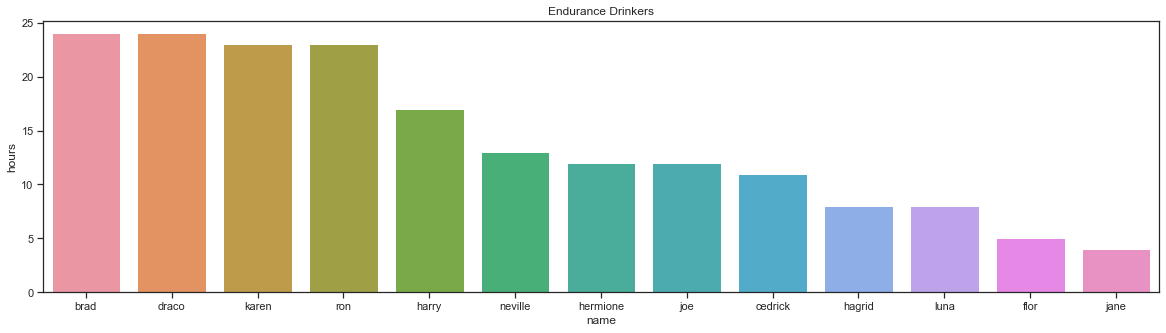

In [843]:
# Endurance Visualization

x = peeps['name']
y = peeps['max']
z = peeps['hours']
plt.figure(figsize=(20,5))
plt.title('Endurance Drinkers')
ax = sns.barplot(x=x, y=z, data=peeps, ci=68)

In [867]:
peeps = peeps.sort_values(by = 'max', ascending = False)

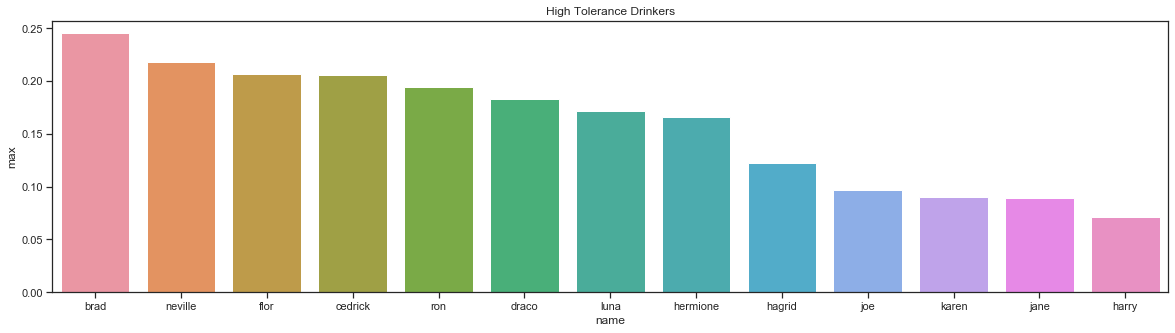

In [868]:
# High tolerenace Visualization

x = peeps['name']
y = peeps['max']
z = peeps['hours']
plt.figure(figsize=(20,5))
plt.title('High Tolerance Drinkers')
ax = sns.barplot(x=x, y=y, data=peeps, ci=68)